In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [78]:
forest = pd.read_csv('/content/forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [79]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [80]:
forest.shape

(517, 31)

In [81]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [82]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


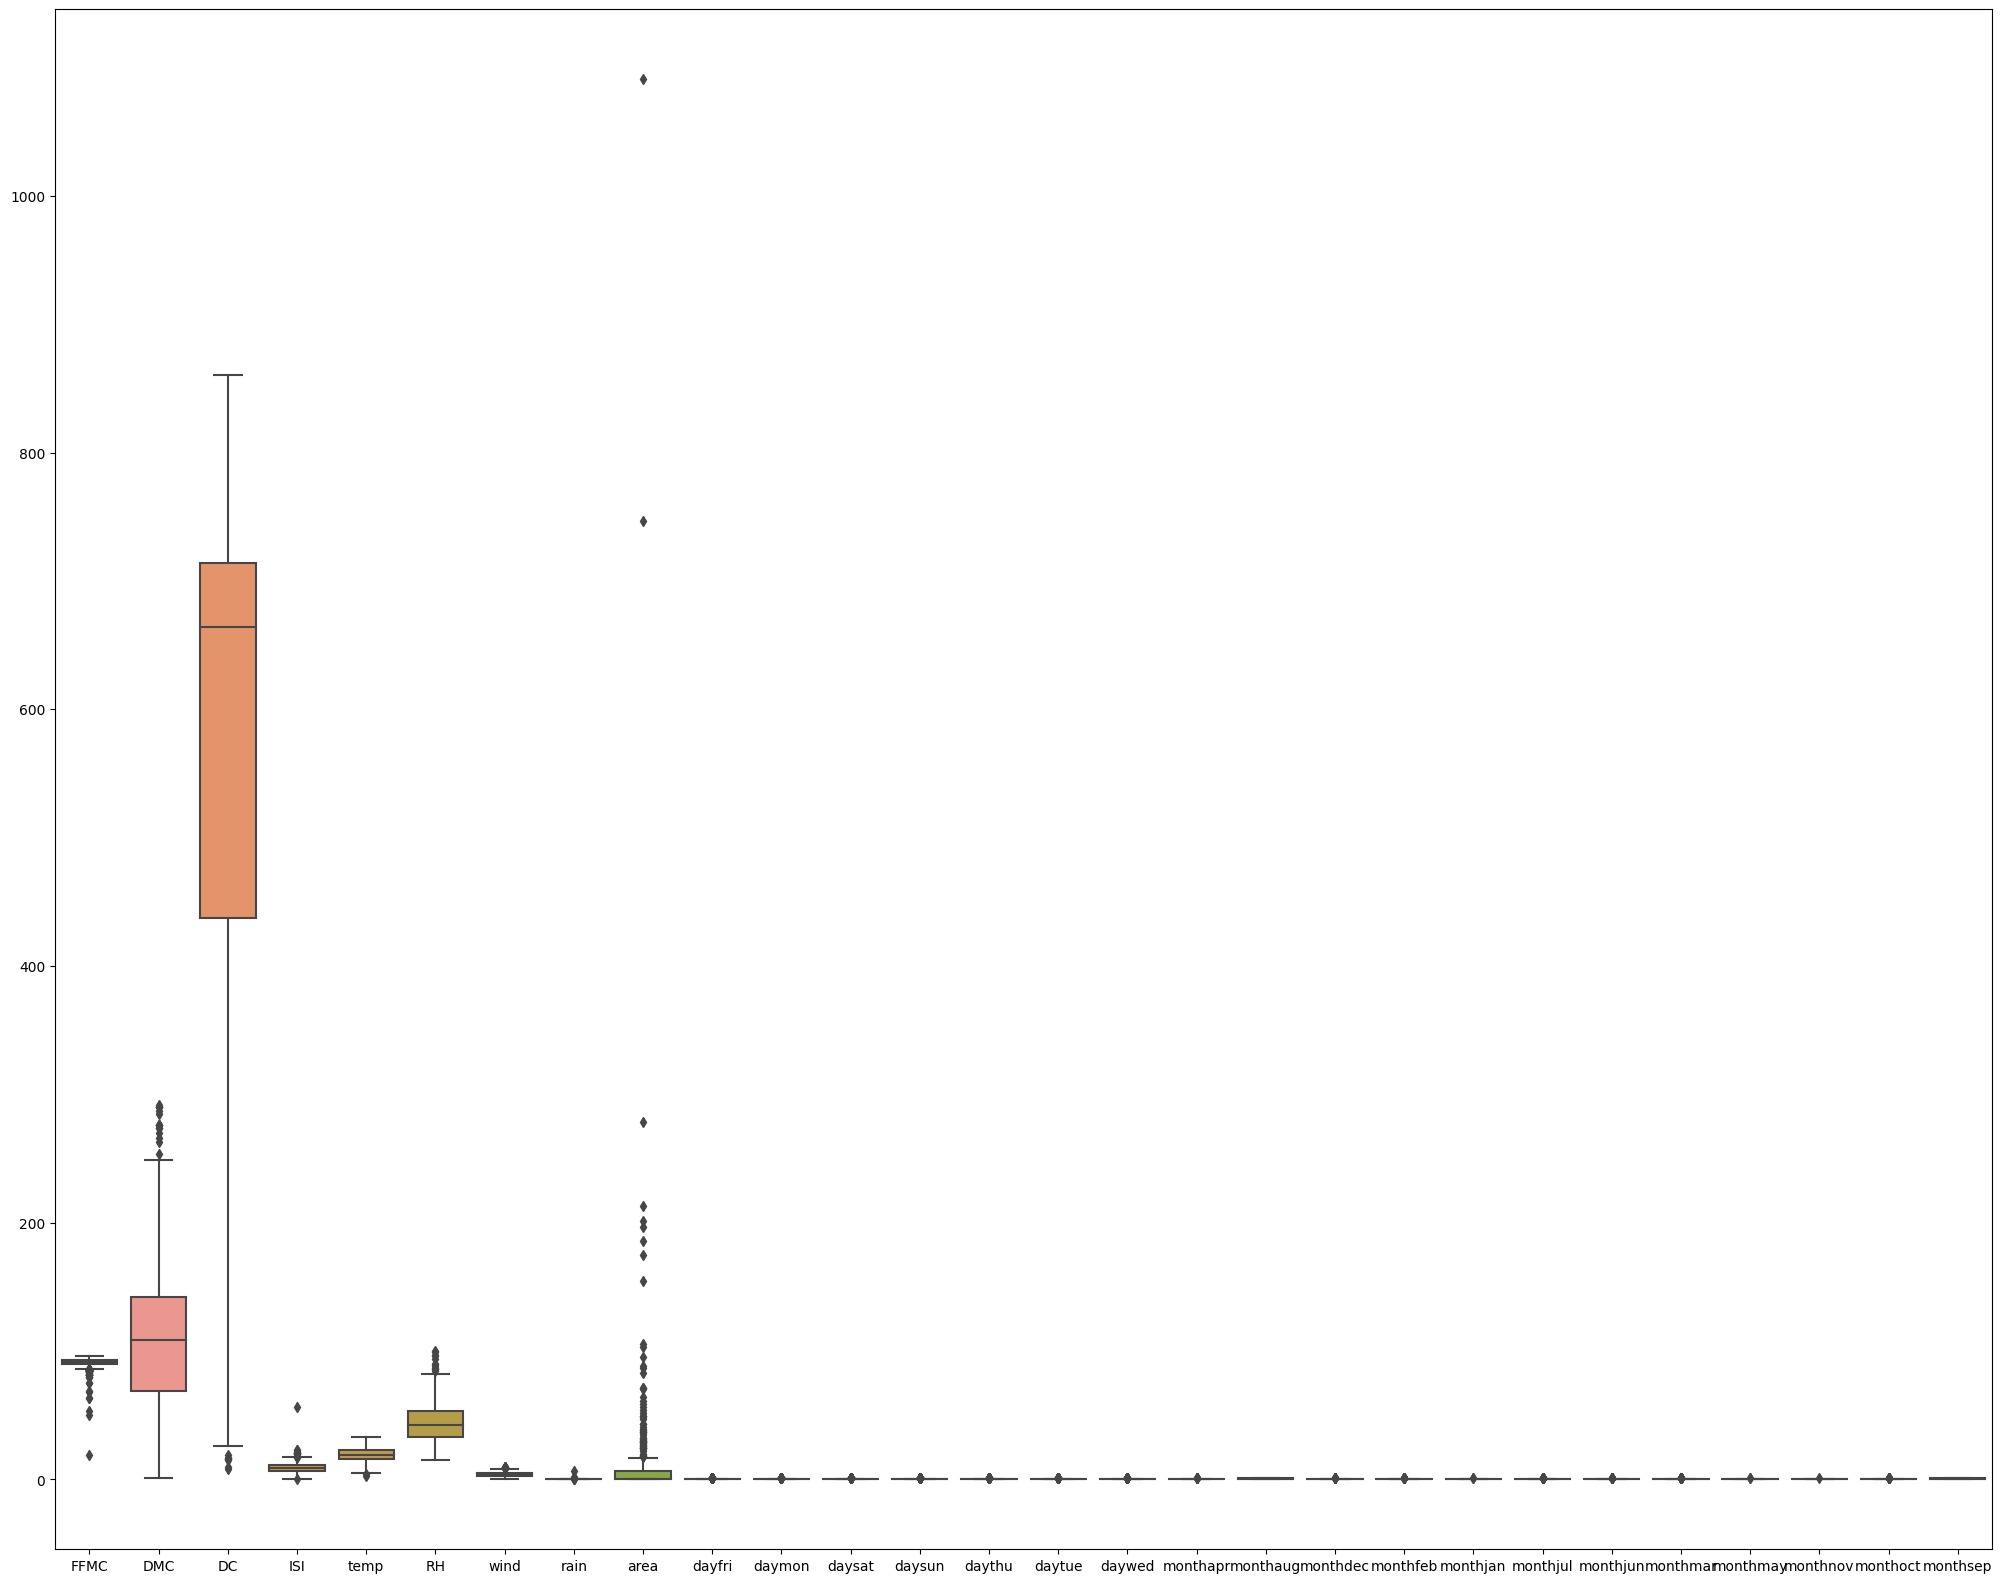

In [83]:
plt.figure(figsize=(25,20))
sns.boxplot(forest)
plt.show()

<Axes: >

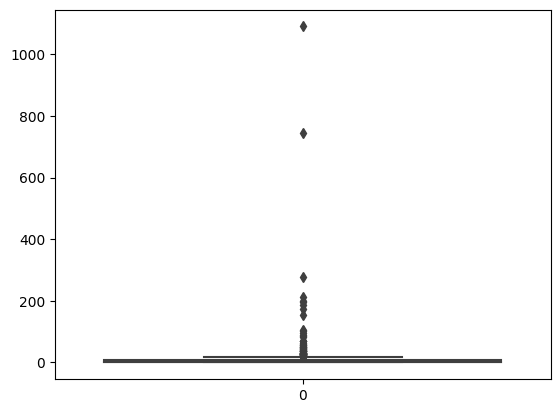

In [84]:
sns.boxplot(forest.area)

In [85]:
#label encoding

from sklearn import preprocessing
label1 = preprocessing.LabelEncoder()
forest.month = label1.fit_transform(forest.month)
forest.day = label1.fit_transform(forest.day)
forest.size_category = label1.fit_transform(forest.size_category)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [86]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [87]:
forest1 = forest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,-1]]

In [88]:
forest1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [89]:
forest1.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

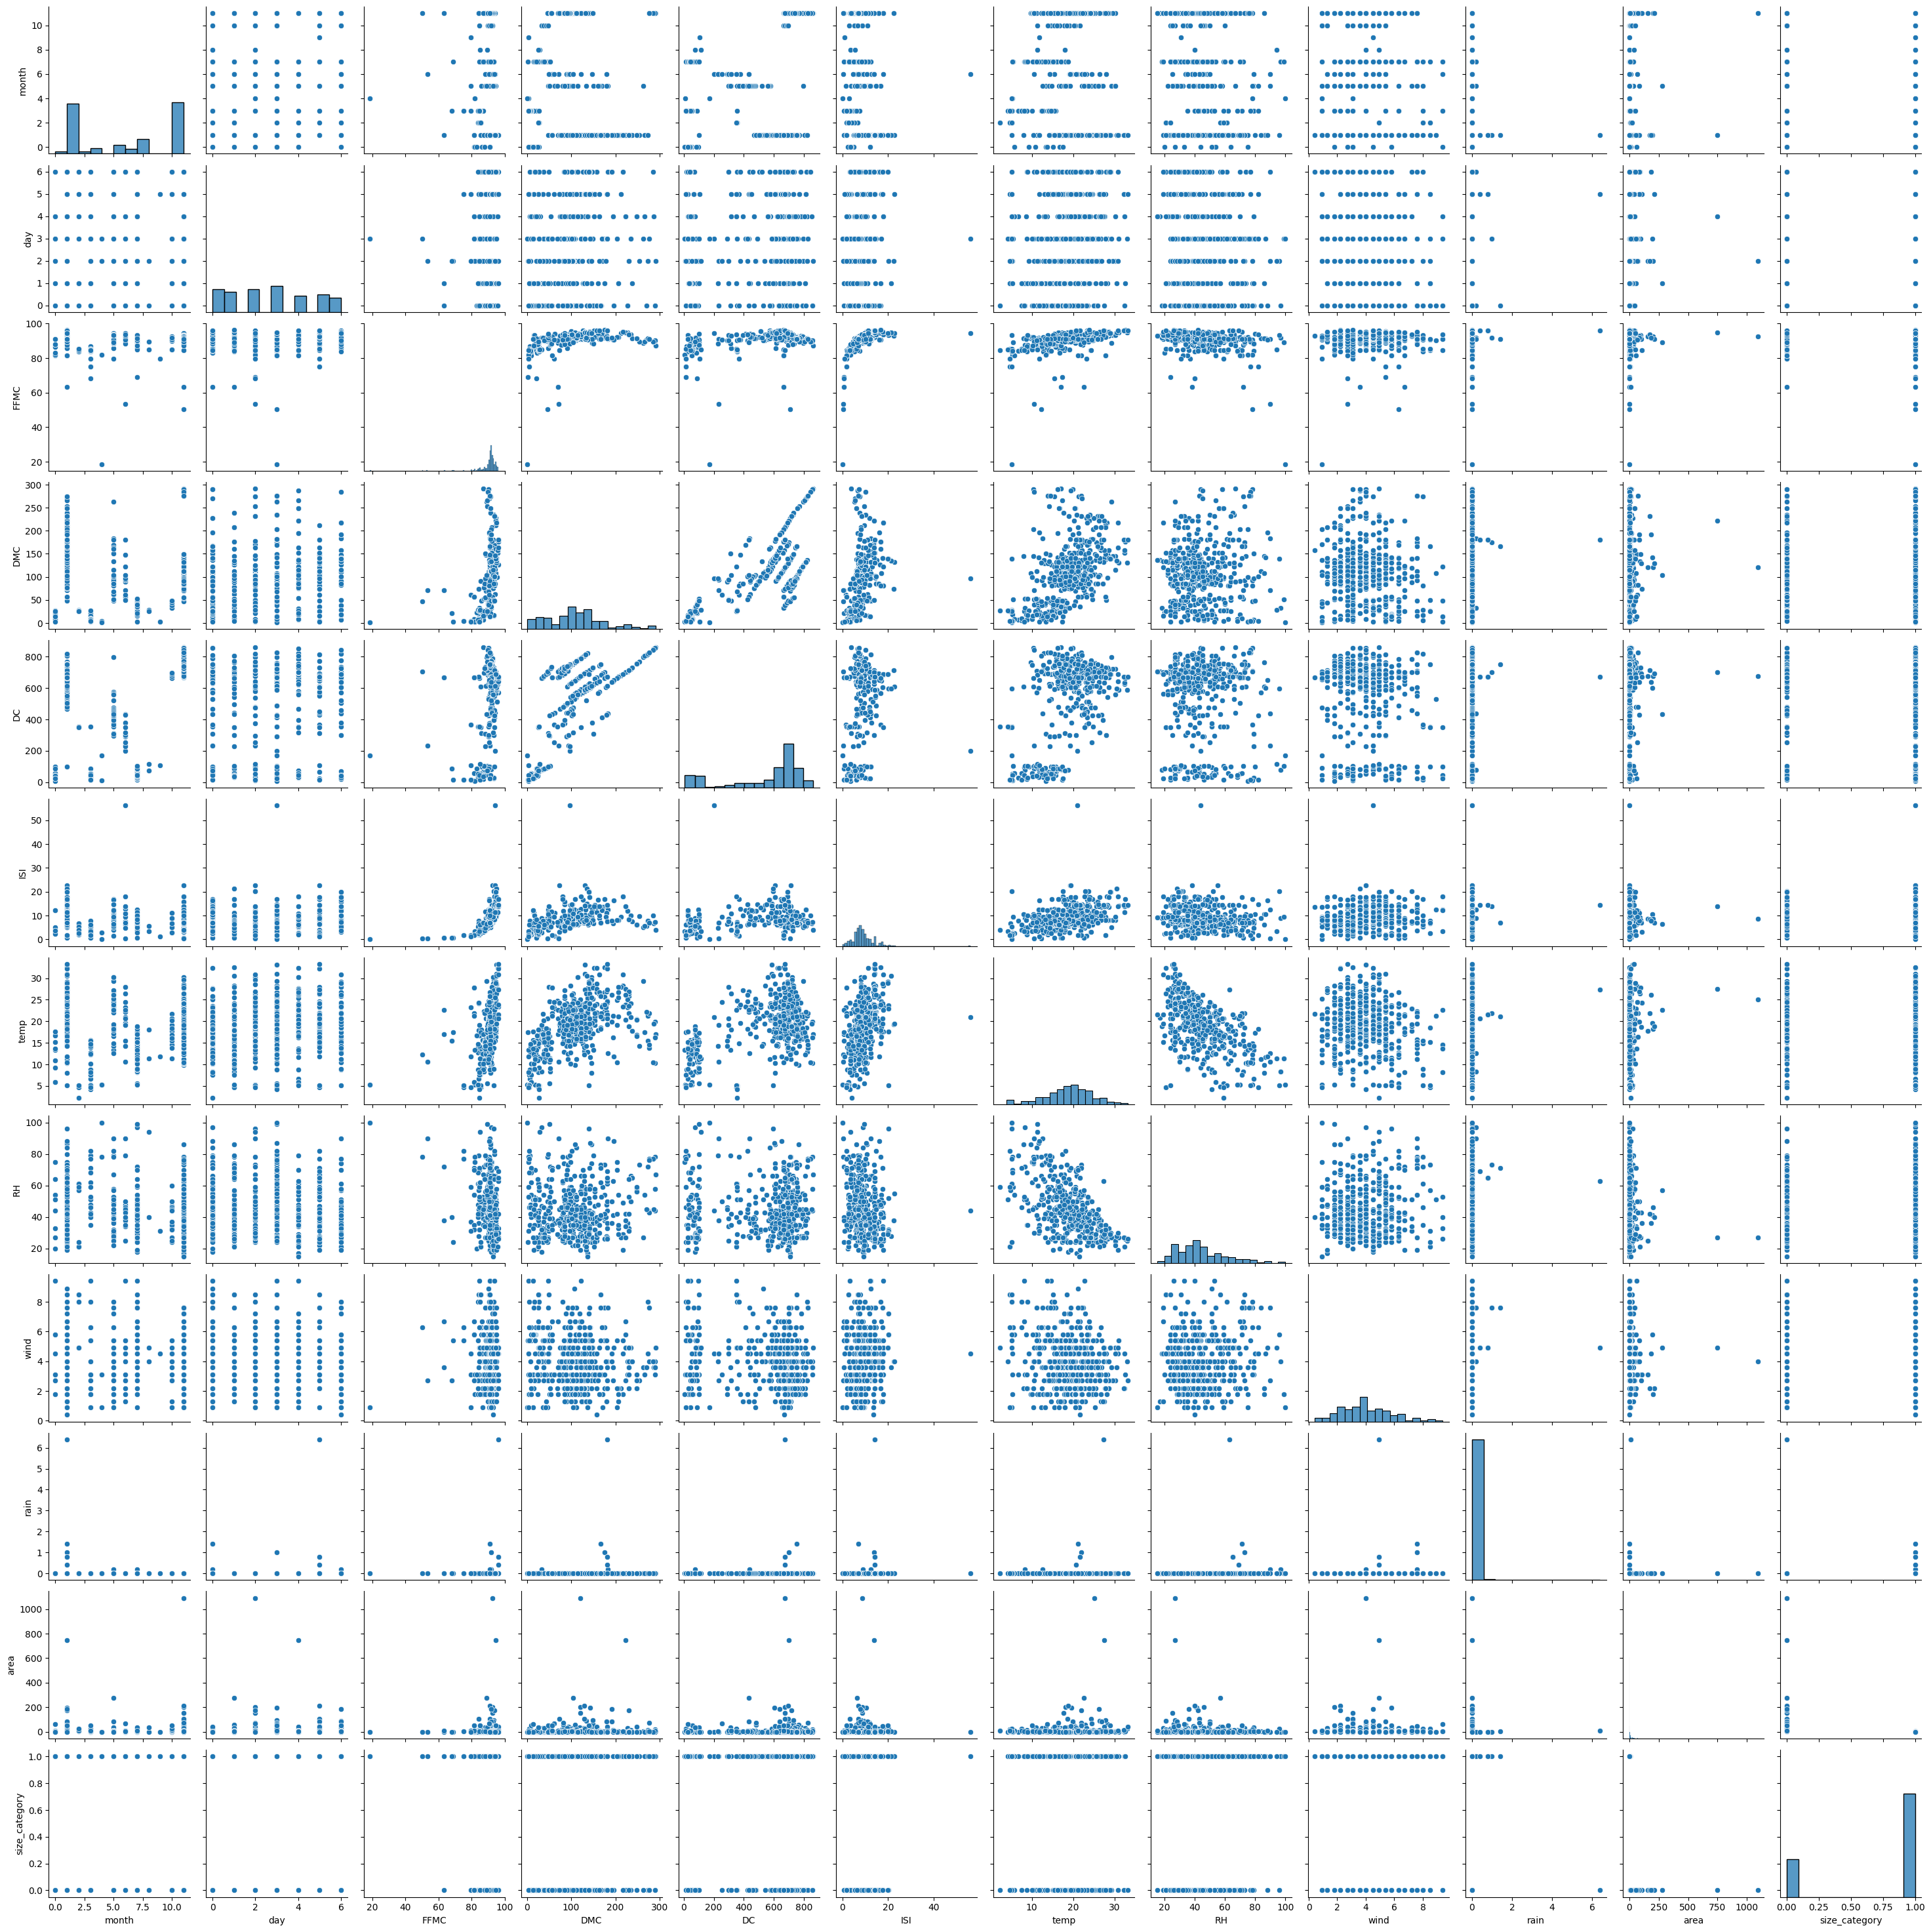

In [90]:
sns.pairplot(forest1)

<Axes: ylabel='month'>

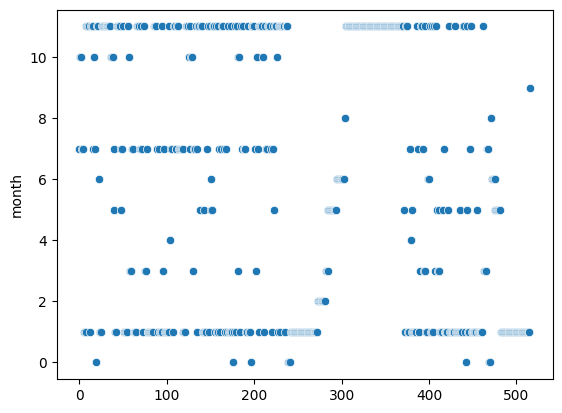

In [91]:
sns.scatterplot(forest1.month)

(array([[517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268., 209.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,   3.,  15.,  25.,  27.,  91., 219.,  51.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 12 BarContainer ob

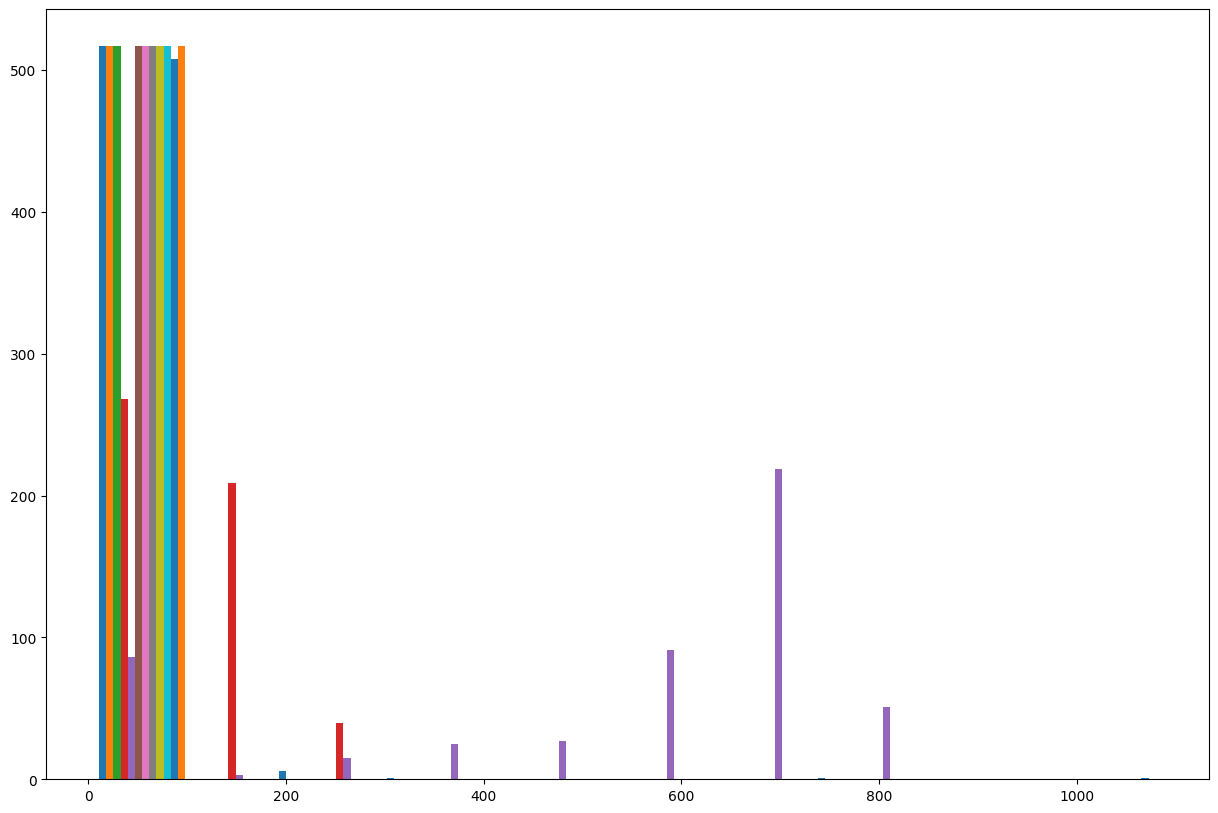

In [92]:
plt.figure(figsize=(15,10))
plt.hist(forest1)

In [93]:
forest1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [94]:
X = forest1.iloc[:,0:11]
Y = forest1.iloc[:,-1]

In [95]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [96]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

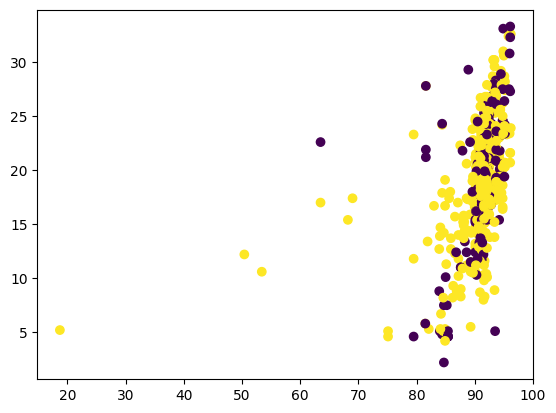

In [98]:
plt.scatter(forest1['FFMC'],forest1['temp'],c=forest1['size_category'])

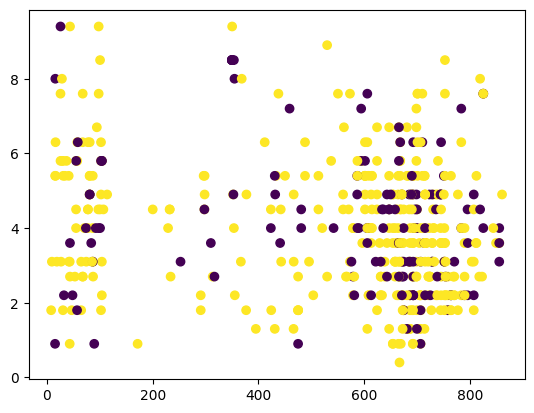

In [99]:
plt.scatter(forest1['DC'],forest1['wind'],c=forest1['size_category'])

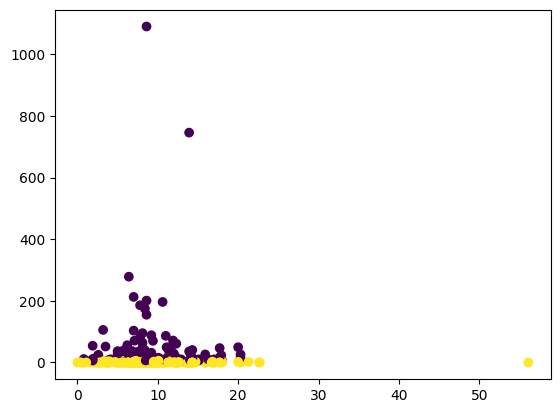

In [100]:
plt.scatter(forest1['ISI'],forest1['area'],c=forest1['size_category'])

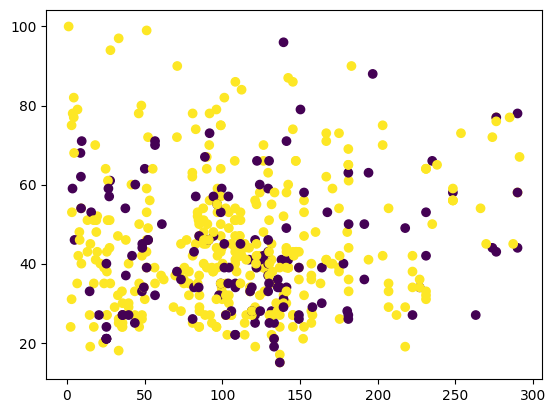

In [101]:
plt.scatter(forest1['DMC'],forest1['RH'],c=forest1['size_category'])

In [125]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100


print("Accuracy= ",acc)

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_preds are the true labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy=  83.97435897435898


array([[ 19,  25],
       [  0, 112]])

In [103]:
((13+117)/(13+25+1+117))

0.8333333333333334

Grid Search

In [113]:
clf = SVC()

param_grid = [{'kernel' : ['rbf'], 'gamma' :[50,5,10,0.5,1,0.001],'C':[1,15,14,13,12,11,10,0.1]}]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001],
                          'kernel': ['rbf']}])

In [114]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.8532282282282283)

In [126]:
clf = SVC(C=1, gamma=0.001, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy = ',acc)
confusion_matrix(y_test,y_pred)

Accuracy =  83.33333333333334


array([[ 19,  25],
       [  1, 111]])

In [127]:
print('Accuracy =',((19+111)/(19+25+1+111)))

Accuracy = 0.8333333333333334
